# Time Independent Schrödinger Equation

## Development

### The Time-Independent Schrödinger Equation

In position-space, Schrödinger's Equation reads:

$\textstyle i\hbar \frac{\partial\Psi}{\partial t} = \frac{-\hbar^2}{2m}\frac{\partial^2\Psi}{\partial x^2}+V\cdot\Psi$

If the potential is independent of time, it is possible to solve the equation by separation of variables. For this, we propose a solution of the form:

$\textstyle \Psi(x,t)=\phi(x)\cdot\chi(t)$

so that the equation becomes:

$\textstyle i\hbar\cdot\phi(x)\frac{\partial\chi(t)}{\partial t} = \frac{-\hbar^2}{2m}\chi(t)\frac{\partial^2\phi(x)}{\partial x^2}+V(x)\cdot\phi(x)\chi(t)$

Dividing through by $\Psi$

$\textstyle \frac{i\hbar}{\chi(t)} \frac{\partial\chi(t)}{\partial t} = \frac{-\hbar^2}{2m}\frac{1}{\phi(x)}\frac{\partial^2\phi(x)}{\partial x^2}+V(x)$

Since both sides of this equation depend only on one variable, they must both equual a constant. Denoting said constant by $E$ we get:

$\textstyle {i\hbar} \frac{\partial\chi(t)}{\partial t} = E\cdot{\chi(t)}$

$\textstyle \frac{-\hbar^2}{2m}\frac{\partial^2\phi(x)}{\partial x^2}+V(x)\cdot\phi(x) = E\cdot\phi(x)$

The second of these is the time-independent Schrödinger Equation, which can alternatively be written in *bracket* notation as

$\displaystyle \hat{H}\left|\phi\right> = E\left|\phi\right>$

**We are going to solve this equation for a particle bounded to a finite region in space.**

___

### Finite Difference Method

Given a function $f(x)$ we can expand $f(x+\Delta x)$ through a Taylor Series expantion about x:

$\textstyle f(x+\Delta x) = f(x) + \Delta x\cdot f'(x) + \mathcal{O}(\Delta x^2)$

so we can define the **first forward finite difference** as:

$f'_+\approx \frac{f(x + \Delta x)-f(x)}{\Delta x}$

similarly, by expanding $f(x-\Delta x)$, we define de **first backwards finite difference**:

$f'_-\approx \frac{f(x)-f(x - \Delta x)}{\Delta x}$

from this we can approximate the second derivative $f''(x)$ by:

$f''(x) \approx \frac{f'_+(x)-f'_-(x)}{\Delta x} = \frac{\frac{f(x + \Delta x)-f(x)}{\Delta x}-\frac{f(x)-f(x - \Delta x)}{\Delta x}}{\Delta x} = \frac{f(x+\Delta x)-2\cdot f(x) + f(x-\Delta x)}{\Delta x^2}$

___

### Numerical Solution to the Time-Independent Schrödinger Equation

If the particle is contained within a finite region of lenght $L$, we can subdivide the region on $N$ subitnervals of lenght $\Delta x = \frac{L}{N}$, such that we define the points:

$0,\,\Delta x,\,2\cdot\Delta x,\,3\cdot\Delta x,\,\dots,\,(N-1)\cdot\Delta x,\,L$

or

$\displaystyle x_0,\,x_1,\,x_2,\,\dots,\,x_{N-1},\,x_N$

thus, if we employ the notation $\phi_i := \phi(x_i)$, we can write Schrödingers Equation in terms of finite difference approximations as:

$\displaystyle \frac{-\hbar^2}{2m}\left(\frac{\phi_{i+1}-2\cdot \phi_i + \phi_{i-1}}{\Delta x^2}\right)+V_i\cdot\phi_i=E\cdot\phi_i$

If the particle is to be bounded to the region in question, we can impose the boundry conditions $\phi_0=\phi_N=0$. Thus, setting $\hbar=m=1$, we get the following equations:

$\begin{cases}\frac{-1}{2\cdot\Delta x^2}\,(\phi_0 - 2\cdot\phi_1 + \phi_2) + V_1\cdot\phi_1 = E\cdot\phi_1\\[5pt]
\frac{-1}{2\cdot\Delta x^2}\,(\phi_1 - 2\cdot\phi_2 + \phi_3) + V_2\cdot\phi_2 = E\cdot\phi_2\\[5pt]
\frac{-1}{2\cdot\Delta x^2}\,(\phi_2 - 2\cdot\phi_3 + \phi_4) + V_3\cdot\phi_3 = E\cdot\phi_3\\[5pt]
\vdots\\[5pt]
\frac{-1}{2\cdot\Delta x^2}\,(\phi_0 - 2\cdot\phi_1 + \phi_2) + V_1\cdot\phi_1 = E\cdot\phi_1\\[5pt]
\frac{-1}{2\cdot\Delta x^2}\,(\phi_{N-2} - 2\cdot\phi_{N-1} + \phi_{N}) + V_1\cdot\phi_{N-1} = E\cdot\phi_{N-1}\end{cases}$

which can be expressed in matrix form as:

$\frac{-1}{2\cdot\Delta x^2}\begin{pmatrix}-2&1&0&0&0&\cdots&0&0&0\\1&-2&1&0&0&\cdots&0&0&0\\0&1&-2&1&0&\cdots&0&0&0\\0&0&1&-2&1&\cdots&0&0&0\\\vdots&\vdots&\vdots&\vdots&\vdots&\ddots&\vdots&\vdots&\vdots\\0&0&0&0&0&\dots&-2&1&0\\0&0&0&0&0&\dots&1&-2&1\\0&0&0&0&0&\dots&0&1&-2\end{pmatrix}\begin{pmatrix}\phi_1\\\phi_2\\\phi_3\\\phi_4\\\vdots\\\phi_{N-3}\\\phi_{N-2}\\\phi_{N-1}\end{pmatrix}+\begin{pmatrix}V_1&0&0&0&0&\cdots&0&0&0\\0&V_2&0&0&0&\cdots&0&0&0\\0&0&V_3&0&0&\cdots&0&0&0\\0&0&0&V_4&0&\cdots&0&0&0\\\vdots&\vdots&\vdots&\vdots&\vdots&\ddots&\vdots&\vdots&\vdots\\0&0&0&0&0&\dots&V_{N-3}&0&0\\0&0&0&0&0&\dots&0&V_{N-2}&0\\0&0&0&0&0&\dots&0&0&V_{N-1}\end{pmatrix}\begin{pmatrix}\phi_1\\\phi_2\\\phi_3\\\phi_4\\\vdots\\\phi_{N-3}\\\phi_{N-2}\\\phi_{N-1}\end{pmatrix}=E\begin{pmatrix}\phi_1\\\phi_2\\\phi_3\\\phi_4\\\vdots\\\phi_{N-3}\\\phi_{N-2}\\\phi_{N-1}\end{pmatrix}$

The first matrix can be associated with the *kinetic energy* $T$, while the second one clearly represents the *potential energy* $V$. Thus, by defining the *Hamiltonian* as $H=T+V$, we have the **discrete** eigenvalue equation:

$H_{ij}\,\phi_i = E\,\phi_i$

which can be solved for the *eigen-energies* and *eigen-sates* by the Linear Algebra module of the Numpy library

___
___

## Code

### Setup

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import os

os.system('rm ti_wf.npy')

0

**Physical Constants**

In [2]:
hbar = 1 # reduced plank's constant
m = 1    # particle's mass

**Problem Parameters**

In [3]:
a = -10 # beginning of the potential well
b = 10  # end of the potential well
N = 81 # number of subintervals

xs = np.linspace(a,b,N,dtype=np.float64) # array of subintervals
dx = xs[1]-xs[0]        # step size

**Potential**

In [4]:
# Definition of the potential function

def potential(x):
    if (a < x < b):
        return 0
    else:
        return 1e20

### Finite Difference Method

**Kinetic Energy**

In [5]:
# Creating the kinetic energy matrix

T = np.zeros((N-2)**2, dtype=np.float64).reshape(N-2,N-2)

for i,row in enumerate(T):
    for j,col in enumerate(row):
        if i==j:
            T[i,j] = -2
        elif abs(i-j) == 1:
            T[i,j] = 1
        else:
            T[i,j] = 0

T = -T*(hbar**2/(2*dx**2))

**Potential Energy**

In [6]:
# Creating the potential energy matrix

V = np.zeros((N-2)**2, dtype=np.float64).reshape(N-2,N-2)

for i,row in enumerate(V):
    for j,col in enumerate(row):
        if i==j:
            V[i,j] = potential(xs[i+1])
        else:
            V[i,j] = 0

**Hamiltonian**

In [7]:
H = T + V

**Eigenvalue Equation**

In [8]:
val,vec = np.linalg.eig(H) # Solving the eigenvalue equation
vec = vec[:,val != 0]      # Dropping the null eigenvectors
val = val[val != 0]        # Dropping the null eigenvalues
z = np.argsort(val)        # Sorting the eigenvalues
z = z[:4]

# Adding a zero at the beggining and end to each eigenvector corresponding to the boundry values
vec = np.insert(vec,0,0,axis=0)
vec = np.insert(vec,vec.shape[0],0,axis=0)

In [9]:
# Normalizing the energies
energies = np.round(val[z]/val[z][0])
print(energies)

[ 1.  4.  9. 16.]


In [10]:
# Normalizing
for i in range(len(z)):
    v = vec[:,z[i]]
    norm = integrate.simpson(v**2,xs)
    v = v/np.sqrt(norm)
    vec[:,z[i]] = v

### Plot

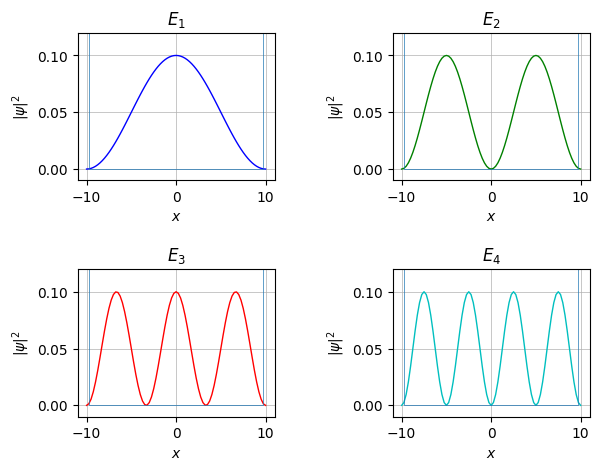

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2,)
colors = ['b','g','r','c']

V = np.array([potential(x) for x in xs])

for i,row in enumerate(ax):
    for j,col in enumerate(row):
        n = 2*i +j
        col.plot(xs,(vec[:,z[n]])**2, lw=1, color=colors[n], label="{} ".format(i))
        col.plot(xs,V,lw=0.5)
        col.grid(lw=0.5)
        col.set_title('$E_{}$'.format(n+1))
        col.set_xlabel('$x$')
        col.set_ylabel('$|\psi|^2$')
        col.set_xlim([-11, 11])
        col.set_ylim([-0.01, 0.12])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9, wspace=0.6, hspace=0.6)

### Exporting Results

In [12]:
ti_wf = {'xs' : xs,
                    0:vec[:,z[0]],
                    1:vec[:,z[1]],
                    2:vec[:,z[2]],
                    3:vec[:,z[3]]}

print(integrate.simpson(vec[:,z[3]]**2,xs))

np.save("ti_wf.npy",ti_wf,allow_pickle=True)

1.0
